In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_breast_cancer
from matplotlib.colors import LinearSegmentedColormap


In [255]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target 

In [257]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

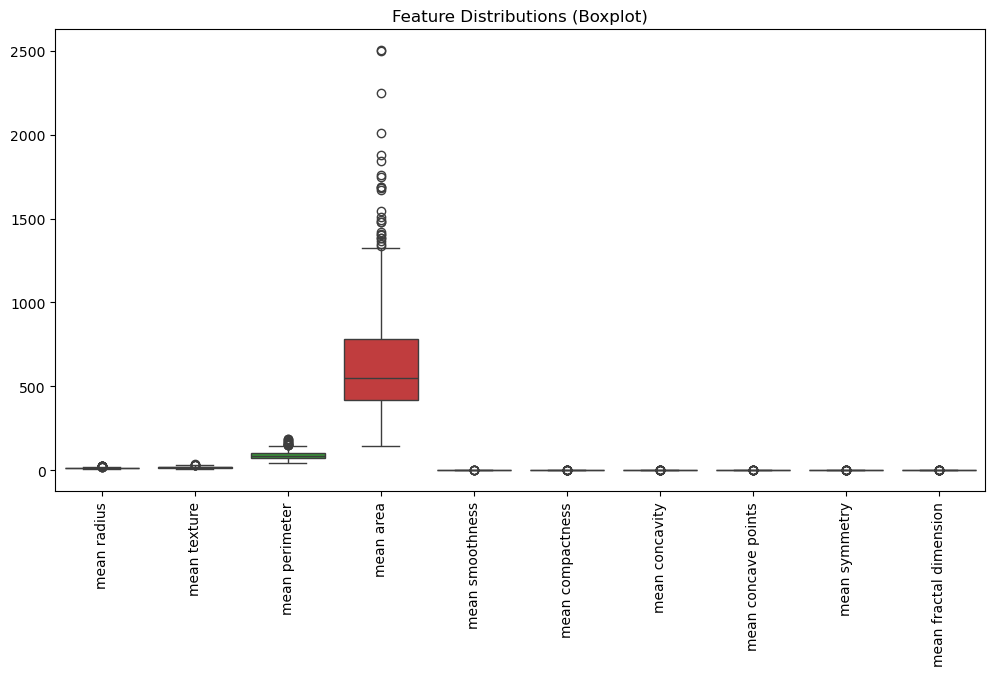

In [259]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :10])  
plt.xticks(rotation=90)
plt.title("Feature Distributions (Boxplot)")
plt.show()

In [260]:
benign = df[df['target'] == 0]['mean radius']
malignant = df[df['target'] == 1]['mean radius']
t_stat, p_value_t = stats.ttest_ind(benign, malignant, equal_var=False)
print(f"T-Test: T-Statistic = {t_stat:.4f}, P-Value = {p_value_t:.4f}")


T-Test: T-Statistic = 22.2088, P-Value = 0.0000


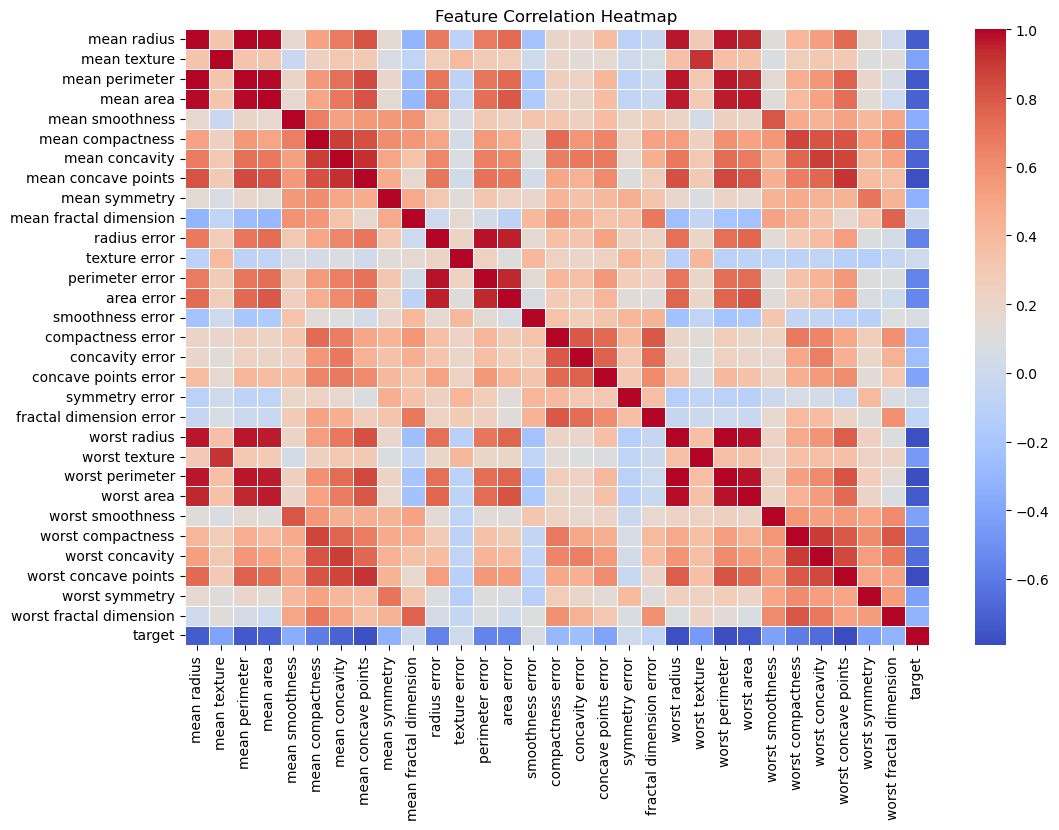

In [263]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19752\1942631517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette=['#ff9999', '#66b3ff'])


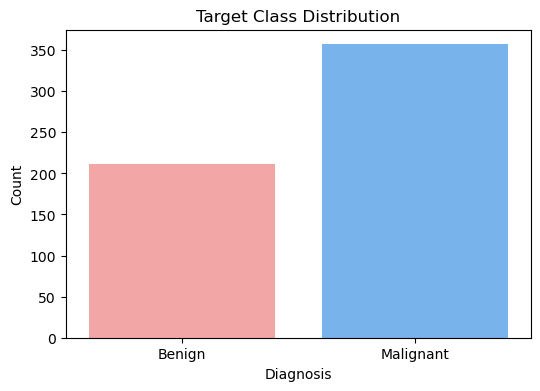

In [264]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['target'], palette=['#ff9999', '#66b3ff'])
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title("Target Class Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()
